In [1]:
## Useful generic Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Additional packages
import os
import sys
import random
import nltk
from nltk.corpus import stopwords
from nltk.collocations import *

In [2]:
## Generic functions
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [3]:
## Use pandas to read in the tsv (tabular separated values) 
train_data = pd.read_csv('train.tsv',sep='\t')
test_data = pd.read_csv('test.tsv',sep='\t')



In [4]:
## Visualize some of the data in training set
train_data.tail()

,PhraseId,SentenceId,Phrase,Sentiment
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2
156059,156060,8544,chortles,2


In [5]:
## Visualize some of the data in the testing set
test_data.tail()

,PhraseId,SentenceId,Phrase
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded
66291,222352,11855,predictable scenario


In [6]:
## Check for any missing values in training set
train_data.isna().any()

PhraseId      False
SentenceId    False
Phrase        False
Sentiment     False
dtype: bool

In [7]:
## Check for any missing values in test set
test_data.isna().any()

PhraseId      False
SentenceId    False
Phrase        False
dtype: bool

In [8]:
## Some basic descriptors of the dataset
train_data.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [9]:
## Prints out the column names
list(train_data.columns)

['PhraseId', 'SentenceId', 'Phrase', 'Sentiment']

In [10]:
## Visualizing how SentenceID is made
np.unique(train_data['SentenceId'], return_counts = True)

(array([   1,    2,    3, ..., 8542, 8543, 8544], dtype=int64),
 array([63, 18, 35, ..., 10,  8, 21], dtype=int64))

In [11]:
## Subsetting the data to understand it better
example_data = train_data[train_data['SentenceId'] == 1]

In [12]:
## Visualizing all the values with a shared SentenceId
np.unique(example_data['Phrase'])

array([',', '.', 'A', 'A series',
       'A series of escapades demonstrating the adage that what is good for the goose',
       'A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .',
       'a story', 'adage', 'also', 'amounts',
       'amounts to much of a story', 'amuses',
       'amuses but none of which amounts to much of a story', 'but',
       'but none of which amounts to much of a story', 'demonstrating',
       'demonstrating the adage',
       'demonstrating the adage that what is good for the goose',
       'escapades',
       'escapades demonstrating the adage that what is good for the goose',
       'for',
       'for the gander , some of which occasionally amuses but none of which amounts to much of a story',
       'for the goose', 'gander', 'good',
       'good for the gander , some of which occasionally amuses but none of which amoun

In [13]:
## In the above block, the items with the same SentenceId are all from the same sentence. They are also different
## splices of the same sentence, and each one has their own sentiment label. I'm not sure if there is a specific way
## they spliced the sentences together.
## it also calls into quesiton if sentence length is related to how many splices are available in the dataset

In [14]:
## Understand the distribution of the sentiment values.
## We can think of this as a numerical distribution from 0-4 with 2 being the neutral value.
print((train_data['Sentiment'] == 0).sum())
print((train_data['Sentiment'] == 1).sum())
print((train_data['Sentiment'] == 2).sum())
print((train_data['Sentiment'] == 3).sum())
print((train_data['Sentiment'] == 4).sum())

7072
27273
79582
32927
9206


In [15]:
## From example subsection, we visualize all slightly negative values
print(*example_data[example_data['Sentiment'] == 1]['Phrase'])

A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story . the gander , some of which occasionally amuses but none of which amounts to much of a story but none of which amounts to much of a story none of which amounts to much of a story


In [16]:
## From example section print all slightly positive values
print(*example_data[example_data['Sentiment'] == 3]['Phrase'])

good for the goose good amuses


Text(0.5, 1.0, 'Number of Counts per Sentiment Rating')

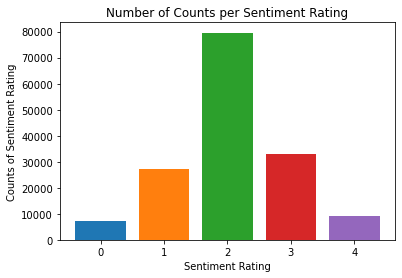

In [17]:
## Visualizing some important data
fig, ax = plt.subplots()
for i in range(5):
    ax.bar(i, (train_data['Sentiment']==i).sum())
ax.set_xlabel('Sentiment Rating')
ax.set_ylabel('Counts of Sentiment Rating')
ax.set_title('Number of Counts per Sentiment Rating')

## This shows that we have an imbalanced dataset, namely that there are much more items that trend towards a 'neutral' sentiment
## Which means that we should downsample everything to around the lowest value, which is the value of 0 at 7072

In [18]:
## Since the smallest class containts 7000 observations still, downsamping all other labels to that size
## should be sufficient, and no upsampling methods should be necessary.

In [19]:
## Create grouped by object
grouped_df = train_data.groupby(['Sentiment'])

In [20]:
## Print Grouped by object for reference
for key, item in grouped_df:
    print(grouped_df.get_group(key), "\n\n")


        PhraseId  SentenceId  \
101          102           3   
103          104           3   
157          158           5   
159          160           5   
201          202           7   
...          ...         ...   
155965    155966        8539   
155967    155968        8539   
155970    155971        8539   
155971    155972        8539   
155973    155974        8539   

                                                   Phrase  Sentiment  
101       would have a hard time sitting through this one          0  
103             have a hard time sitting through this one          0  
157     Aggressive self-glorification and a manipulati...          0  
159       self-glorification and a manipulative whitewash          0  
201                Trouble Every Day is a plodding mess .          0  
...                                                   ...        ...  
155965  has turned out nearly 21\/2 hours of unfocused...          0  
155967  turned out nearly 21\/2 hours of unfocu

In [21]:
## Downsampling the data
# There may be a more efficient way, but I will proceed with something that I know will work

## Create list aggregator

sep_data = []
## Iterate and append
for i in range(5):
    sep_data.append(train_data[train_data['Sentiment'] == i])

## Sanity check
print(sep_data[2].head())

   PhraseId  SentenceId                                             Phrase  \
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   
5         6           1  of escapades demonstrating the adage that what...   

   Sentiment  
1          2  
2          2  
3          2  
4          2  
5          2  


In [22]:
## Find minimum value of all the items

## initialize
min_val = 1e6
min_ind = np.nan

## Iterate
for index, item in enumerate(sep_data):
    
    ## Assign based off condition
    if len(item) < min_val:
        min_val = len(item)
        min_ind = index

## Check final values
min_val, min_ind

## I did a sort of roundabout way in case I would like to preprocess the data additionally, so this would flow 
## from a pipeline

(7072, 0)

In [23]:
## Reorder every item in the list, then truncate/downsample it 
new_list = []
for item in sep_data:
    
    ## The pandas sample method reorders the values according to documentation
    reorder = item.sample(frac=1)
    
    ## Truncate the rows to downsample everything to the same size as the smallest length
    downsample = reorder.iloc[:min_val, :]
    
    ## Sanity check
    print(downsample.shape)
    
    ## append
    new_list.append(downsample)

(7072, 4)
(7072, 4)
(7072, 4)
(7072, 4)
(7072, 4)


In [24]:
## Now re rebuild the training dataset

train = pd.concat(new_list)

## shape check
train.shape

(35360, 4)

Text(0.5, 1.0, 'Number of Counts per Sentiment Rating')

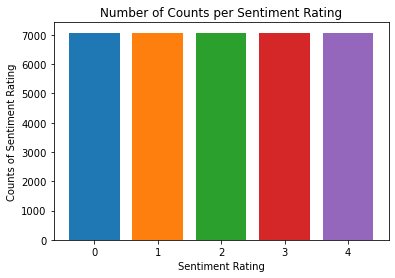

In [25]:
## Visualizing the new training dataset
fig, ax = plt.subplots()
for i in range(5):
    ax.bar(i, (train['Sentiment']==i).sum())
ax.set_xlabel('Sentiment Rating')
ax.set_ylabel('Counts of Sentiment Rating')
ax.set_title('Number of Counts per Sentiment Rating')

## Now we can see that we have a dataset with equal labels in all categories.

In [26]:
newtrain = train.sort_values(['PhraseId'])

In [27]:
newtrain.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
20,21,1,is,2
30,31,1,also,2
33,34,1,"the gander , some of which occasionally amuses...",1
34,35,1,"the gander ,",2


In [28]:
## Export the downsampled version to tsv to use in the later functions
train.to_csv('training.tsv', sep="\t", index = False)

In [29]:
## For another experiment I will aggregate the sentiment values differently

In [30]:
for i in sep_data:
    print(i)

        PhraseId  SentenceId  \
101          102           3   
103          104           3   
157          158           5   
159          160           5   
201          202           7   
...          ...         ...   
155965    155966        8539   
155967    155968        8539   
155970    155971        8539   
155971    155972        8539   
155973    155974        8539   

                                                   Phrase  Sentiment  
101       would have a hard time sitting through this one          0  
103             have a hard time sitting through this one          0  
157     Aggressive self-glorification and a manipulati...          0  
159       self-glorification and a manipulative whitewash          0  
201                Trouble Every Day is a plodding mess .          0  
...                                                   ...        ...  
155965  has turned out nearly 21\/2 hours of unfocused...          0  
155967  turned out nearly 21\/2 hours of unfocu

In [31]:
## Replace the values with three labels instead of four
sep_data[0]['Sentiment'] = sep_data[0]['Sentiment'].replace(0, '0')
sep_data[1]['Sentiment'] = sep_data[1]['Sentiment'].replace(1, '0')
sep_data[2]['Sentiment'] = sep_data[2]['Sentiment'].replace(2, '1')
sep_data[3]['Sentiment'] = sep_data[3]['Sentiment'].replace(3, '2')
sep_data[4]['Sentiment'] = sep_data[4]['Sentiment'].replace(4, '2')


C:\Users\du_ja\AppData\Local\Temp\ipykernel_11220\2132379191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sep_data[0]['Sentiment'] = sep_data[0]['Sentiment'].replace(0, '0')
C:\Users\du_ja\AppData\Local\Temp\ipykernel_11220\2132379191.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sep_data[1]['Sentiment'] = sep_data[1]['Sentiment'].replace(1, '0')
C:\Users\du_ja\AppData\Local\Temp\ipykernel_11220\2132379191.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [32]:
sep_data

[        PhraseId  SentenceId  \
 101          102           3   
 103          104           3   
 157          158           5   
 159          160           5   
 201          202           7   
 ...          ...         ...   
 155965    155966        8539   
 155967    155968        8539   
 155970    155971        8539   
 155971    155972        8539   
 155973    155974        8539   
 
                                                    Phrase Sentiment  
 101       would have a hard time sitting through this one         0  
 103             have a hard time sitting through this one         0  
 157     Aggressive self-glorification and a manipulati...         0  
 159       self-glorification and a manipulative whitewash         0  
 201                Trouble Every Day is a plodding mess .         0  
 ...                                                   ...       ...  
 155965  has turned out nearly 21\/2 hours of unfocused...         0  
 155967  turned out nearly 21\/2 h

In [33]:
temp_data = []
temp_data.append(pd.concat([sep_data[0], sep_data[1]]))
temp_data.append(sep_data[2])
temp_data.append(pd.concat([sep_data[3], sep_data[4]]))
temp_data[2]

,PhraseId,SentenceId,Phrase,Sentiment
21,22,1,good for the goose,2
22,23,1,good,2
46,47,1,amuses,2
64,65,2,"This quiet , introspective and entertaining in...",2
67,68,2,"quiet , introspective and entertaining",2
...,...,...,...,...
155946,155947,8537,is laughingly enjoyable,2
155955,155956,8538,a unique culture that is presented with univer...,2
155961,155962,8538,with universal appeal,2
156007,156008,8541,really do a great job of anchoring the charact...,2


In [34]:
## Find minimum value of all the items

## initialize
min_val = 1e6
min_ind = np.nan

## Iterate
for index, item in enumerate(temp_data):
    
    ## Assign based off condition
    if len(item) < min_val:
        min_val = len(item)
        min_ind = index

## Check final values
min_val, min_ind

## I did a sort of roundabout way in case I would like to preprocess the data additionally, so this would flow 
## from a pipeline

(34345, 0)

In [35]:
## Reorder every item in the list, then truncate/downsample it 
new_list_1 = []
for item in temp_data:
    
    ## The pandas sample method reorders the values according to documentation
    reorder = item.sample(frac=1)
    
    ## Truncate the rows to downsample everything to the same size as the smallest length
    downsample1 = reorder.iloc[:min_val, :]
    
    ## Sanity check
    print(downsample1.shape)
    
    ## append
    new_list_1.append(downsample1)

(34345, 4)
(34345, 4)
(34345, 4)


In [36]:
train_1 = pd.concat(new_list_1)
train_1.tail()

,PhraseId,SentenceId,Phrase,Sentiment
64731,64732,3277,many can aspire but none can equal,2
21425,21426,958,"entertaining , if ultimately minor ,",2
94135,94136,4912,'s actually pretty funny,2
85257,85258,4408,"is moody , oozing , chilling and heart-warming...",2
31652,31653,1483,excellent music,2


In [37]:
label_1, counts_1 =  np.unique(train_1['Sentiment'], return_counts = True)

In [38]:
label_1

array(['0', '1', '2'], dtype=object)

Text(0.5, 1.0, 'Number of Counts per Sentiment Rating')

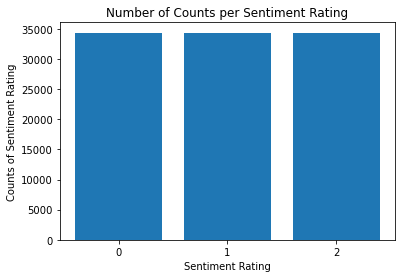

In [39]:
## Visualizing the new training dataset
fig, ax = plt.subplots()
ax.bar(label_1, counts_1)
ax.set_xlabel('Sentiment Rating')
ax.set_ylabel('Counts of Sentiment Rating')
ax.set_title('Number of Counts per Sentiment Rating')

## Now we can see that we have a dataset with equal labels in all categories.

In [40]:
train_1.to_csv('train_1.tsv', sep="\t", index = False)

In [4]:
## ## define feature definition functions
# this function define features (keywords) of a document for a BOW/unigram baseline
# each feature is 'V_(keyword)' and is true or false depending
# on whether that keyword is in the document


def document_features(document, word_features):
    
    ## Create the entire dataset
    document_words = set(document)
    
    ## Intialize the aggregator
    features = {}
    
    ## Iterate for each word in word_features, and match it for the document
    for word in word_features:
        features['V_{}'.format(word)] = (word in document_words)
    return features

In [5]:
#list of negation words to create a negation feature:

## This can be extended as a potential 'experiment'
negationwords = ['no', 'not', 'never', 'none', 'nowhere', 'nothing', 'noone',
                 'rather', 'hardly', 'scarcely', 'rarely', 'seldom', 'neither', 'nor']

In [6]:
# Creating the NOT features function
def NOT_features(document, word_features, negationwords):
    
    ## Creating Aggregator
    features = {}
    
    ## Assigning False for every word feature and word not feature
    for word in word_features:
        features['V_{}'.format(word)] = False
        features['V_NOT{}'.format(word)] = False
        
    # go through document words in order
    for i in range(0, len(document)):
        
        ## Take individual word
        word = document[i]
        
        ## Conditional that checks for negation words before assigning regular features
        if ((i + 1) < len(document)) and ((word in negationwords) or (word.endswith("n't"))):
            i += 1
            features['V_NOT{}'.format(document[i])] = (document[i] in word_features)
        else:
            features['V_{}'.format(word)] = (word in word_features)
    return features

In [7]:
#Defining the POS features function
def POS_features(document, word_features):
    
    ## Assigning relevant items from the document
    document_words = set(document)
    tagged_words = nltk.pos_tag(document)
    
    ## Intialize the aggregator
    features = {}
    
    # checking for a match between the features and document
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    
    ## Intializing counting aggregators
    numNoun = 0
    numVerb = 0
    numAdj = 0
    numAdverb = 0
    
    ## Properly assigning the relevant pos tags.
    for (word, tag) in tagged_words:
        if tag.startswith('N'): numNoun += 1
        if tag.startswith('V'): numVerb += 1
        if tag.startswith('J'): numAdj += 1
        if tag.startswith('R'): numAdverb += 1
    features['nouns'] = numNoun
    features['verbs'] = numVerb
    features['adjectives'] = numAdj
    features['adverbs'] = numAdverb
    return features

In [8]:
## cross-validation ##
# this function takes the number of folds, the feature sets and the labels
# it iterates over the folds, using different sections for training and testing in turn
#   it prints the performance for each fold and the average performance at the end


def cross_validation_PRF(num_folds, featuresets, labels):
    
    ## Calculate the block size at which function is trained with
    subset_size = int(len(featuresets)/num_folds)
    print('Each fold size:', subset_size)
    
    ## Find length of labels, and initialize metrics with list of zerores
    num_labels = len(labels)
    total_precision_list = [0] * num_labels
    total_recall_list = [0] * num_labels
    total_F1_list = [0] * num_labels

    ## Iterator over each fold
    for i in range(num_folds):
        print('\n_________________________________________')
        
        print('\nFold Iteration ' + str(i))
        
        
        ## Creates the training and testing batch
        test_this_round = featuresets[(i*subset_size):][:subset_size]
        train_this_round = featuresets[:(i*subset_size)] + featuresets[((i+1)*subset_size):]
        
        ## Create the classifier for iteration
        classifier = nltk.NaiveBayesClassifier.train(train_this_round)
        
        ## Initialize aggregators for both lists
        goldlist = []
        predictedlist = []
        
        ## impute and append the actual results and testing results for each round
        for (features, label) in test_this_round:
            goldlist.append(label)
            predictedlist.append(classifier.classify(features))

        # Calculate eval metrics 
        print('Fold', i)
        (precision_list, recall_list, F1_list) \
                  = eval_measures(goldlist, predictedlist, labels)
        
        # Print metric headers
        print('\tPrecision\tRecall\t\tF1')
        
        # print metric values to 3 decimal places
        for i, lab in enumerate(labels):
            print(lab, '\t', "{:10.3f}".format(precision_list[i]), \
              "{:10.3f}".format(recall_list[i]), "{:10.3f}".format(F1_list[i]))

        for i in range(num_labels):
            # Aggregate the total sums to a list
            total_precision_list[i] += precision_list[i]
            total_recall_list[i] += recall_list[i]
            total_F1_list[i] += F1_list[i]

  
    # Compute the average of all evaluation metrics
    precision_list = [tot/num_folds for tot in total_precision_list]
    recall_list = [tot/num_folds for tot in total_recall_list]
    F1_list = [tot/num_folds for tot in total_F1_list]
    
    ## Print out the headers for eval metrics
    print('\nAverage Precision\tRecall\t\tF1 \tPer Label')
    
    # Print metric  values to three decimal places
    for i, lab in enumerate(labels):
        print(lab, '\t', "{:10.3f}".format(precision_list[i]), \
          "{:10.3f}".format(recall_list[i]), "{:10.3f}".format(F1_list[i]))
    
    # print average metrics over all labels 
    print('\nMacro Average Precision\tRecall\t\tF1 \tOver All Labels')
    print('\t', "{:10.3f}".format(sum(precision_list)/num_labels), \
          "{:10.3f}".format(sum(recall_list)/num_labels), \
          "{:10.3f}".format(sum(F1_list)/num_labels))

    # for micro averaging, weight the scores for each label by the number of items
    # this is better for labels with imbalance
    # first intialize a dictionary for label counts and then count them
    
    ## Create empty dictionary
    label_counts = {}
    
    ## Create the indices, initialize value to 0 
    for lab in labels:
      label_counts[lab] = 0 
    
    ## Count total labels
    for (doc, lab) in featuresets:
      label_counts[lab] += 1
    
    ## Weight the labels based off of the number of labels in comparison to the number of documents available
    num_docs = len(featuresets)
    label_weights = [(label_counts[lab] / num_docs) for lab in labels]
    print('\nLabel Counts', label_counts)
   
    # print micro average over all labels
    print('Micro Average Precision\tRecall\t\tF1 \tOver All Labels')
    precision = sum([a * b for a,b in zip(precision_list, label_weights)])
    recall = sum([a * b for a,b in zip(recall_list, label_weights)])
    F1 = sum([a * b for a,b in zip(F1_list, label_weights)])
    print( '\t', "{:10.3f}".format(precision), \
      "{:10.3f}".format(recall), "{:10.3f}".format(F1))
    



In [9]:
# Function to compute precision, recall and F1 for each label
#  and for any number of labels
# Input: list of gold labels, list of predicted labels (in same order)
# Output: returns lists of precision, recall and F1 for each label
#      (for computing averages across folds and labels)

def eval_measures(gold, predicted, labels):
    
    # Initialize each list 
    recall_list = []
    precision_list = []
    F1_list = []

    for lab in labels:
        # Set all aggregators to zero for each loop
        TP = FP = FN = TN = 0
        
        ## Assign the proper confusion matrix identifiers
        for i, val in enumerate(gold):
            if val == lab and predicted[i] == lab:  TP += 1
            if val == lab and predicted[i] != lab:  FN += 1
            if val != lab and predicted[i] == lab:  FP += 1
            if val != lab and predicted[i] != lab:  TN += 1
       
        ## Using the computed confusion matrix items, calculate the relevant evaluation metrics
        if (TP == 0) or (FP == 0) or (FN == 0):
          recall_list.append (0)
          precision_list.append (0)
          F1_list.append(0)
        else:
          recall = TP / (TP + FP)
          precision = TP / (TP + FN)
          recall_list.append(recall)
          precision_list.append(precision)
          F1_list.append( 2 * (recall * precision) / (recall + precision))

    # the evaluation measures in a table with one row per label
    return (precision_list, recall_list, F1_list)



In [18]:
## function to read kaggle training file, train and test a classifier 

## An interesting experiment could be seeing how the downsampled data and the original data compare to each other
## for this reason it is worthwihle to add another imput parameter fname
## As long as the file is in tsv format, there should be no issue with it
def processkaggle(dirPath,limitStr, fname):
    # convert the limit argument from a string to an int
    limit = int(limitStr)

    ## Set directory path
    dirPath0 = os.getcwd()
    dirPath = dirPath0
    print('dirPath in processkaggle function: ', dirPath)
    
    ## open the relevant tsv file
    f = open(fname, 'r')
    
    # Initialize list aggregator
    phrasedata = []
    
    for line in f:
    # ignore the first line starting with Phrase and read all lines
        if (not line.startswith('Phrase')):
            # remove final end of line character
            line = line.strip()
            # each line has 4 items separated by tabs
            
            ## This extracts the phrase and sentiment value only while dropping all others
            phrasedata.append(line.split('\t')[2:4])

    ## Shuffles the data before truncating it to obtain a random sample of the phrase data
    random.shuffle(phrasedata)
    phraselist = phrasedata[:limit]
    #print(phraselist)
    
    ## General Prints tatement
    print('Read', len(phrasedata), 'phrases, using', len(phraselist), 'random phrases')

    # Initialize list of phrase documents as (list of words, label)
    phrasedocs = []
   
    # add all the phrases
    # each phrase has a list of tokens and the sentiment label (from 0 to 4)
    ### bin to only 3 categories for better performance
    # I'm not sure if the below code actually bins into three, so I will manipulate the input tsv file
    # To have a version with only three categories.
    for phrase in phraselist:
    ## Create our tokens and add them with the corresponding sentiment label
        tokens = nltk.word_tokenize(phrase[0])
        phrasedocs.append((tokens, int(phrase[1])))

    # possibly filter tokens
    # lowercase - each phrase is a pair consisting of a token list and a label
    docs = []
    for phrase in phrasedocs:
        lowerphrase = ([w.lower() for w in phrase[0]], phrase[1])
        docs.append (lowerphrase)
    # print a few
    for phrase in docs[:10]:
        print (phrase)

    # continue as usual to get all words and create word features
    all_words_list = [word for (sent,cat) in docs for word in sent]
    all_words = nltk.FreqDist(all_words_list)
    print(len(all_words))


    # get the 1500 most frequently appearing keywords in the corpus
    word_items = all_words.most_common(1500)
    word_features = [word for (word,count) in word_items]

    stopwords = nltk.corpus.stopwords.words('english')

    # remove some negation words 
    negationwords.extend(['ain', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'ma', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'])

    newstopwords = [word for word in stopwords if word not in negationwords]
    # remove stop words from the all words list
    new_all_words_list = [word for (sent,cat) in docs for word in sent if word not in newstopwords]

    # continue to define a new all words dictionary, get the 1500 most common as new_word_features
    new_all_words = nltk.FreqDist(new_all_words_list)
    new_word_items = new_all_words.most_common(1500)

    new_word_features = [word for (word,count) in new_word_items]

    #Creating Bigram features
    finder = BigramCollocationFinder.from_words(all_words_list)
    # define the top 500 bigrams using the chi squared measure
    bigram_features = finder.nbest(bigram_measures.chi_sq, 500)

    def bigram_document_features(document, word_features, bigram_features):
        document_words = set(document)
        document_bigrams = nltk.bigrams(document)
        features = {}
        for word in word_features:
          features['V_{}'.format(word)] = (word in document_words)
        for bigram in bigram_features:
          features['B_{}_{}'.format(bigram[0], bigram[1])] = (bigram in document_bigrams)    
        return features

    # feature sets from feature definition functions above
    featuresets = [(document_features(d, word_features), c) for (d, c) in docs]
    negfeaturesets = [(NOT_features(d, word_features, negationwords), c) for (d, c) in docs]
    bigramfeaturesets = [(bigram_document_features(d, word_features, bigram_features), c) for (d, c) in docs]
    POSfeaturesets = [(POS_features(d, new_word_features), c) for (d, c) in docs]
    # train classifier and show performance in cross-validation
    # make a list of labels
    label_list = [c for (d,c) in docs]
    labels = list(set(label_list))    # gets only unique labels
    num_folds = 100

    #printing cross validation results for every feature and combination feature 
    #Unigram or Bag-of-Words (BOW) features; this is the baseline:
    print("\nOriginal Featureset")
    cross_validation_PRF(num_folds, featuresets, labels)
    #Bigrams
    print("\nBigrams Featureset")
    cross_validation_PRF(num_folds, bigramfeaturesets, labels)
    #Negation -- SHOULD BE CREATED
    print("\nNegated Featureset")
    cross_validation_PRF(num_folds, negfeaturesets, labels)
    #POS features -- SHOULD BE CREATED
    print("\nPOS Featureset")
    cross_validation_PRF(num_folds, POSfeaturesets, labels)

In [19]:
## Original dataset: train.tsv
# Downsampled: training.tsv
# Reduced # of labels train_1.tsv

In [20]:
## Leavning the 'main' execution code untouched
"""
commandline interface takes a directory name with kaggle subdirectory for train.tsv
   and a limit to the number of kaggle phrases to use
It then processes the files and trains a kaggle movie review sentiment classifier.

"""
dirPath0 = os.getcwd()
dirPath = dirPath0
print('dirpath in program execution code (last line in the code): ', dirPath)
processkaggle(dirPath, 10000, 'train.tsv')

dirpath in program execution code (last line in the code):  C:\Users\du_ja\Syracuse Coding\IST 664 NLP\Final Project
dirPath in processkaggle function:  C:\Users\du_ja\Syracuse Coding\IST 664 NLP\Final Project
Read 156060 phrases, using 10000 random phrases
(['it', 'falls', 'far', 'short', 'of', 'poetry', ',', 'but', 'it', "'s", 'not', 'bad', 'prose'], 3)
(['built', 'for', 'controversy'], 3)
(['that', 'shatters', 'her', 'cheery', 'and', 'tranquil', 'suburban', 'life'], 2)
(['wes'], 2)
(['featuring', 'a', 'fall', 'from', 'grace', 'that', 'still', 'leaves', 'shockwaves'], 2)
(['a', 'stunning', 'fusion'], 2)
(['consistently', 'amusing'], 3)
(['dark', 'humor', ','], 2)
(['really', 'know', 'who', '``', 'they', '``', 'were', ',', 'what', '``', 'they', '``', 'looked', 'like'], 2)
(['bad', 'clive', 'barker', 'movie'], 0)
10412

Original Featureset
Each fold size: 100

_________________________________________

Fold Iteration 0
Fold 0
	Precision	Recall		F1
0 	      0.333      0.333      0.333
1

Fold 27
	Precision	Recall		F1
0 	      0.167      0.500      0.250
1 	      0.250      0.286      0.267
2 	      0.796      0.652      0.717
3 	      0.105      0.154      0.125
4 	      0.000      0.000      0.000

_________________________________________

Fold Iteration 28
Fold 28
	Precision	Recall		F1
0 	      0.167      0.333      0.222
1 	      0.263      0.417      0.323
2 	      0.816      0.597      0.690
3 	      0.263      0.417      0.323
4 	      0.286      0.333      0.308

_________________________________________

Fold Iteration 29
Fold 29
	Precision	Recall		F1
0 	      0.200      0.250      0.222
1 	      0.412      0.438      0.424
2 	      0.851      0.667      0.748
3 	      0.261      0.375      0.308
4 	      0.125      0.250      0.167

_________________________________________

Fold Iteration 30
Fold 30
	Precision	Recall		F1
0 	      0.250      0.500      0.333
1 	      0.286      0.600      0.387
2 	      0.812      0.549      0.655
3 	      0.318      0.583   

Fold 57
	Precision	Recall		F1
0 	      0.200      0.250      0.222
1 	      0.353      0.353      0.353
2 	      0.729      0.625      0.673
3 	      0.208      0.312      0.250
4 	      0.167      0.143      0.154

_________________________________________

Fold Iteration 58
Fold 58
	Precision	Recall		F1
0 	      0.000      0.000      0.000
1 	      0.304      0.500      0.378
2 	      0.872      0.594      0.707
3 	      0.190      0.500      0.276
4 	      0.250      0.200      0.222

_________________________________________

Fold Iteration 59
Fold 59
	Precision	Recall		F1
0 	      0.000      0.000      0.000
1 	      0.444      0.615      0.516
2 	      0.907      0.681      0.778
3 	      0.278      0.417      0.333
4 	      0.125      0.333      0.182

_________________________________________

Fold Iteration 60
Fold 60
	Precision	Recall		F1
0 	      0.000      0.000      0.000
1 	      0.333      0.385      0.357
2 	      0.815      0.677      0.739
3 	      0.217      0.357   

Fold 87
	Precision	Recall		F1
0 	      0.000      0.000      0.000
1 	      0.550      0.611      0.579
2 	      0.755      0.656      0.702
3 	      0.200      0.231      0.214
4 	      0.500      0.429      0.462

_________________________________________

Fold Iteration 88
Fold 88
	Precision	Recall		F1
0 	      0.286      0.500      0.364
1 	      0.176      0.250      0.207
2 	      0.891      0.690      0.778
3 	      0.071      0.091      0.080
4 	      0.143      0.500      0.222

_________________________________________

Fold Iteration 89
Fold 89
	Precision	Recall		F1
0 	      0.400      0.333      0.364
1 	      0.316      0.400      0.353
2 	      0.786      0.688      0.733
3 	      0.529      0.643      0.581
4 	      0.000      0.000      0.000

_________________________________________

Fold Iteration 90
Fold 90
	Precision	Recall		F1
0 	      0.000      0.000      0.000
1 	      0.429      0.333      0.375
2 	      0.843      0.672      0.748
3 	      0.250      0.500   

Fold 15
	Precision	Recall		F1
0 	      0.000      0.000      0.000
1 	      0.150      0.200      0.171
2 	      0.772      0.710      0.739
3 	      0.167      0.176      0.171
4 	      0.000      0.000      0.000

_________________________________________

Fold Iteration 16
Fold 16
	Precision	Recall		F1
0 	      0.333      0.167      0.222
1 	      0.235      0.444      0.308
2 	      0.815      0.620      0.704
3 	      0.167      0.333      0.222
4 	      0.000      0.000      0.000

_________________________________________

Fold Iteration 17
Fold 17
	Precision	Recall		F1
0 	      0.200      0.200      0.200
1 	      0.167      0.200      0.182
2 	      0.811      0.632      0.711
3 	      0.176      0.375      0.240
4 	      0.286      0.500      0.364

_________________________________________

Fold Iteration 18
Fold 18
	Precision	Recall		F1
0 	      0.000      0.000      0.000
1 	      0.056      0.125      0.077
2 	      0.796      0.589      0.677
3 	      0.278      0.455   

Fold 45
	Precision	Recall		F1
0 	      0.250      0.143      0.182
1 	      0.211      0.308      0.250
2 	      0.827      0.683      0.748
3 	      0.261      0.462      0.333
4 	      0.000      0.000      0.000

_________________________________________

Fold Iteration 46
Fold 46
	Precision	Recall		F1
0 	      0.143      0.200      0.167
1 	      0.167      0.231      0.194
2 	      0.796      0.597      0.683
3 	      0.118      0.250      0.160
4 	      0.250      0.500      0.333

_________________________________________

Fold Iteration 47
Fold 47
	Precision	Recall		F1
0 	      0.000      0.000      0.000
1 	      0.385      0.357      0.370
2 	      0.825      0.681      0.746
3 	      0.238      0.357      0.286
4 	      0.000      0.000      0.000

_________________________________________

Fold Iteration 48
Fold 48
	Precision	Recall		F1
0 	      0.167      0.167      0.167
1 	      0.235      0.444      0.308
2 	      0.800      0.656      0.721
3 	      0.261      0.400   

Fold 75
	Precision	Recall		F1
0 	      0.750      0.375      0.500
1 	      0.273      0.353      0.308
2 	      0.816      0.667      0.734
3 	      0.353      0.462      0.400
4 	      0.125      0.500      0.200

_________________________________________

Fold Iteration 76
Fold 76
	Precision	Recall		F1
0 	      0.000      0.000      0.000
1 	      0.286      0.444      0.348
2 	      0.862      0.694      0.769
3 	      0.158      0.300      0.207
4 	      0.333      0.286      0.308

_________________________________________

Fold Iteration 77
Fold 77
	Precision	Recall		F1
0 	      0.000      0.000      0.000
1 	      0.444      0.250      0.320
2 	      0.849      0.643      0.732
3 	      0.217      0.556      0.312
4 	      0.143      0.333      0.200

_________________________________________

Fold Iteration 78
Fold 78
	Precision	Recall		F1
0 	      0.375      0.750      0.500
1 	      0.286      0.444      0.348
2 	      0.875      0.646      0.743
3 	      0.375      0.529   

Fold 3
	Precision	Recall		F1
0 	      0.167      0.125      0.143
1 	      0.400      0.667      0.500
2 	      0.787      0.638      0.705
3 	      0.300      0.500      0.375
4 	      0.143      0.100      0.118

_________________________________________

Fold Iteration 4
Fold 4
	Precision	Recall		F1
0 	      0.500      0.091      0.154
1 	      0.150      0.250      0.187
2 	      0.655      0.643      0.649
3 	      0.294      0.333      0.312
4 	      0.000      0.000      0.000

_________________________________________

Fold Iteration 5
Fold 5
	Precision	Recall		F1
0 	      0.600      0.750      0.667
1 	      0.438      0.412      0.424
2 	      0.685      0.673      0.679
3 	      0.318      0.438      0.368
4 	      0.333      0.125      0.182

_________________________________________

Fold Iteration 6
Fold 6
	Precision	Recall		F1
0 	      0.167      0.091      0.118
1 	      0.292      0.500      0.368
2 	      0.800      0.655      0.720
3 	      0.429      0.643      0.51

Fold 33
	Precision	Recall		F1
0 	      0.000      0.000      0.000
1 	      0.182      0.154      0.167
2 	      0.649      0.712      0.679
3 	      0.211      0.286      0.242
4 	      0.500      0.385      0.435

_________________________________________

Fold Iteration 34
Fold 34
	Precision	Recall		F1
0 	      0.600      0.375      0.462
1 	      0.294      0.417      0.345
2 	      0.707      0.483      0.574
3 	      0.167      0.357      0.227
4 	      0.429      0.500      0.462

_________________________________________

Fold Iteration 35
Fold 35
	Precision	Recall		F1
0 	      0.250      0.286      0.267
1 	      0.357      0.417      0.385
2 	      0.804      0.617      0.698
3 	      0.296      0.533      0.381
4 	      0.200      0.167      0.182

_________________________________________

Fold Iteration 36
Fold 36
	Precision	Recall		F1
0 	      0.250      0.091      0.133
1 	      0.188      0.231      0.207
2 	      0.725      0.661      0.692
3 	      0.200      0.556   

Fold 63
	Precision	Recall		F1
0 	      0.500      0.200      0.286
1 	      0.250      0.333      0.286
2 	      0.811      0.717      0.761
3 	      0.263      0.500      0.345
4 	      0.500      0.500      0.500

_________________________________________

Fold Iteration 64
Fold 64
	Precision	Recall		F1
0 	      0.000      0.000      0.000
1 	      0.389      0.467      0.424
2 	      0.702      0.623      0.660
3 	      0.160      0.286      0.205
4 	      0.500      0.364      0.421

_________________________________________

Fold Iteration 65
Fold 65
	Precision	Recall		F1
0 	      0.000      0.000      0.000
1 	      0.318      0.538      0.400
2 	      0.667      0.667      0.667
3 	      0.263      0.385      0.312
4 	      0.667      0.364      0.471

_________________________________________

Fold Iteration 66
Fold 66
	Precision	Recall		F1
0 	      0.500      0.333      0.400
1 	      0.095      0.167      0.121
2 	      0.745      0.614      0.673
3 	      0.294      0.333   

Fold 93
	Precision	Recall		F1
0 	      0.000      0.000      0.000
1 	      0.333      0.267      0.296
2 	      0.603      0.660      0.631
3 	      0.240      0.429      0.308
4 	      0.667      0.250      0.364

_________________________________________

Fold Iteration 94
Fold 94
	Precision	Recall		F1
0 	      0.500      0.154      0.235
1 	      0.353      0.400      0.375
2 	      0.680      0.680      0.680
3 	      0.333      0.545      0.414
4 	      0.455      0.455      0.455

_________________________________________

Fold Iteration 95
Fold 95
	Precision	Recall		F1
0 	      0.167      0.125      0.143
1 	      0.083      0.100      0.091
2 	      0.800      0.667      0.727
3 	      0.261      0.545      0.353
4 	      0.667      0.545      0.600

_________________________________________

Fold Iteration 96
Fold 96
	Precision	Recall		F1
0 	      0.250      0.091      0.133
1 	      0.154      0.111      0.129
2 	      0.655      0.760      0.704
3 	      0.304      0.538   

Fold 21
	Precision	Recall		F1
0 	      0.750      0.500      0.600
1 	      0.214      0.375      0.273
2 	      0.893      0.758      0.820
3 	      0.409      0.600      0.486
4 	      0.500      0.400      0.444

_________________________________________

Fold Iteration 22
Fold 22
	Precision	Recall		F1
0 	      0.000      0.000      0.000
1 	      0.294      0.294      0.294
2 	      0.783      0.600      0.679
3 	      0.276      0.571      0.372
4 	      0.250      0.167      0.200

_________________________________________

Fold Iteration 23
Fold 23
	Precision	Recall		F1
0 	      0.000      0.000      0.000
1 	      0.118      0.250      0.160
2 	      0.878      0.606      0.717
3 	      0.217      0.455      0.294
4 	      0.200      0.167      0.182

_________________________________________

Fold Iteration 24
Fold 24
	Precision	Recall		F1
0 	      0.111      0.250      0.154
1 	      0.062      0.083      0.071
2 	      0.808      0.609      0.694
3 	      0.333      0.500   

Fold 51
	Precision	Recall		F1
0 	      0.000      0.000      0.000
1 	      0.217      0.417      0.286
2 	      0.788      0.612      0.689
3 	      0.111      0.154      0.129
4 	      0.200      0.250      0.222

_________________________________________

Fold Iteration 52
Fold 52
	Precision	Recall		F1
0 	      0.333      0.500      0.400
1 	      0.222      0.308      0.258
2 	      0.690      0.453      0.547
3 	      0.161      0.312      0.213
4 	      0.167      0.200      0.182

_________________________________________

Fold Iteration 53
Fold 53
	Precision	Recall		F1
0 	      0.000      0.000      0.000
1 	      0.438      0.438      0.438
2 	      0.911      0.708      0.797
3 	      0.222      0.571      0.320
4 	      0.000      0.000      0.000

_________________________________________

Fold Iteration 54
Fold 54
	Precision	Recall		F1
0 	      0.500      0.400      0.444
1 	      0.118      0.250      0.160
2 	      0.896      0.632      0.741
3 	      0.292      0.438   

Fold 81
	Precision	Recall		F1
0 	      0.000      0.000      0.000
1 	      0.583      0.412      0.483
2 	      0.911      0.773      0.836
3 	      0.286      0.667      0.400
4 	      0.429      0.429      0.429

_________________________________________

Fold Iteration 82
Fold 82
	Precision	Recall		F1
0 	      0.200      0.333      0.250
1 	      0.316      0.545      0.400
2 	      0.933      0.592      0.724
3 	      0.174      0.308      0.222
4 	      0.000      0.000      0.000

_________________________________________

Fold Iteration 83
Fold 83
	Precision	Recall		F1
0 	      0.000      0.000      0.000
1 	      0.250      0.417      0.312
2 	      0.843      0.652      0.735
3 	      0.263      0.455      0.333
4 	      0.429      0.500      0.462

_________________________________________

Fold Iteration 84
Fold 84
	Precision	Recall		F1
0 	      0.143      0.143      0.143
1 	      0.389      0.438      0.412
2 	      0.778      0.689      0.730
3 	      0.062      0.083   

In [21]:
## Leavning the 'main' execution code untouched
"""
commandline interface takes a directory name with kaggle subdirectory for train.tsv
   and a limit to the number of kaggle phrases to use
It then processes the files and trains a kaggle movie review sentiment classifier.

"""
dirPath0 = os.getcwd()
dirPath = dirPath0
print('dirpath in program execution code (last line in the code): ', dirPath)
processkaggle(dirPath, 10000, 'training.tsv')

dirpath in program execution code (last line in the code):  C:\Users\du_ja\Syracuse Coding\IST 664 NLP\Final Project
dirPath in processkaggle function:  C:\Users\du_ja\Syracuse Coding\IST 664 NLP\Final Project
Read 35360 phrases, using 10000 random phrases
(['it', 'ends', 'up', 'being', 'neither', ',', 'and', 'fails', 'at', 'both', 'endeavors', '.'], 0)
(['the', 'way', 'the', 'roundelay', 'of', 'partners', 'functions', ',', 'and', 'the', 'interplay', 'within', 'partnerships', 'and', 'among', 'partnerships', 'and', 'the', 'general', 'air', 'of', 'gator-bashing', 'are', 'consistently', 'delightful', '.'], 4)
(['the', 'homeric', 'kind'], 2)
(['seem', 'at', 'times', 'too', 'many'], 1)
(["'s", 'exactly', 'the', 'kind', 'of', 'movie', 'toback', "'s", 'detractors', 'always', 'accuse', 'him', 'of', 'making'], 1)
(['is', 'hereby', 'given', 'fair', 'warning', '.'], 1)
(['of', 'passion'], 3)
(['crummy-looking', 'videotape'], 0)
(['becomes', 'a', 'sprawl', 'of', 'uncoordinated', 'vectors', '.'], 1

Fold 25
	Precision	Recall		F1
0 	      0.381      0.444      0.410
1 	      0.263      0.417      0.323
2 	      0.609      0.368      0.459
3 	      0.182      0.250      0.211
4 	      0.400      0.375      0.387

_________________________________________

Fold Iteration 26
Fold 26
	Precision	Recall		F1
0 	      0.400      0.421      0.410
1 	      0.292      0.500      0.368
2 	      0.720      0.375      0.493
3 	      0.143      0.182      0.160
4 	      0.353      0.750      0.480

_________________________________________

Fold Iteration 27
Fold 27
	Precision	Recall		F1
0 	      0.478      0.478      0.478
1 	      0.200      0.444      0.276
2 	      0.731      0.404      0.521
3 	      0.400      0.429      0.414
4 	      0.312      0.714      0.435

_________________________________________

Fold Iteration 28
Fold 28
	Precision	Recall		F1
0 	      0.450      0.529      0.486
1 	      0.250      0.375      0.300
2 	      0.700      0.412      0.519
3 	      0.429      0.500   

Fold 55
	Precision	Recall		F1
0 	      0.545      0.522      0.533
1 	      0.278      0.455      0.345
2 	      0.737      0.389      0.509
3 	      0.250      0.400      0.308
4 	      0.440      0.550      0.489

_________________________________________

Fold Iteration 56
Fold 56
	Precision	Recall		F1
0 	      0.450      0.529      0.486
1 	      0.000      0.000      0.000
2 	      0.619      0.271      0.377
3 	      0.158      0.375      0.222
4 	      0.412      0.412      0.412

_________________________________________

Fold Iteration 57
Fold 57
	Precision	Recall		F1
0 	      0.444      0.308      0.364
1 	      0.333      0.529      0.409
2 	      0.800      0.476      0.597
3 	      0.389      0.538      0.452
4 	      0.571      0.800      0.667

_________________________________________

Fold Iteration 58
Fold 58
	Precision	Recall		F1
0 	      0.542      0.619      0.578
1 	      0.250      0.385      0.303
2 	      0.875      0.400      0.549
3 	      0.333      0.583   

Fold 85
	Precision	Recall		F1
0 	      0.526      0.667      0.588
1 	      0.294      0.294      0.294
2 	      0.833      0.357      0.500
3 	      0.174      0.444      0.250
4 	      0.478      0.647      0.550

_________________________________________

Fold Iteration 86
Fold 86
	Precision	Recall		F1
0 	      0.619      0.650      0.634
1 	      0.176      0.250      0.207
2 	      0.708      0.472      0.567
3 	      0.222      0.308      0.258
4 	      0.600      0.632      0.615

_________________________________________

Fold Iteration 87
Fold 87
	Precision	Recall		F1
0 	      0.583      0.467      0.519
1 	      0.192      0.385      0.256
2 	      0.833      0.306      0.448
3 	      0.273      0.545      0.364
4 	      0.364      0.667      0.471

_________________________________________

Fold Iteration 88
Fold 88
	Precision	Recall		F1
0 	      0.333      0.438      0.378
1 	      0.071      0.091      0.080
2 	      0.650      0.289      0.400
3 	      0.200      0.400   

Fold 13
	Precision	Recall		F1
0 	      0.385      0.357      0.370
1 	      0.182      0.444      0.258
2 	      0.684      0.333      0.448
3 	      0.056      0.100      0.071
4 	      0.500      0.500      0.500

_________________________________________

Fold Iteration 14
Fold 14
	Precision	Recall		F1
0 	      0.333      0.286      0.308
1 	      0.316      0.500      0.387
2 	      0.769      0.500      0.606
3 	      0.300      0.400      0.343
4 	      0.522      0.632      0.571

_________________________________________

Fold Iteration 15
Fold 15
	Precision	Recall		F1
0 	      0.562      0.643      0.600
1 	      0.348      0.444      0.390
2 	      0.667      0.378      0.483
3 	      0.188      0.176      0.182
4 	      0.292      0.500      0.368

_________________________________________

Fold Iteration 16
Fold 16
	Precision	Recall		F1
0 	      0.294      0.312      0.303
1 	      0.222      0.444      0.296
2 	      0.789      0.357      0.492
3 	      0.231      0.545   

Fold 43
	Precision	Recall		F1
0 	      0.583      0.538      0.560
1 	      0.250      0.375      0.300
2 	      0.857      0.486      0.621
3 	      0.267      0.308      0.286
4 	      0.464      0.619      0.531

_________________________________________

Fold Iteration 44
Fold 44
	Precision	Recall		F1
0 	      0.400      0.500      0.444
1 	      0.250      0.400      0.308
2 	      0.667      0.343      0.453
3 	      0.200      0.235      0.216
4 	      0.462      0.545      0.500

_________________________________________

Fold Iteration 45
Fold 45
	Precision	Recall		F1
0 	      0.500      0.500      0.500
1 	      0.000      0.000      0.000
2 	      0.769      0.263      0.392
3 	      0.067      0.167      0.095
4 	      0.517      0.625      0.566

_________________________________________

Fold Iteration 46
Fold 46
	Precision	Recall		F1
0 	      0.474      0.333      0.391
1 	      0.174      0.333      0.229
2 	      0.571      0.316      0.407
3 	      0.000      0.000   

Fold 73
	Precision	Recall		F1
0 	      0.474      0.529      0.500
1 	      0.286      0.571      0.381
2 	      0.857      0.333      0.480
3 	      0.263      0.385      0.312
4 	      0.650      0.650      0.650

_________________________________________

Fold Iteration 74
Fold 74
	Precision	Recall		F1
0 	      0.467      0.500      0.483
1 	      0.231      0.500      0.316
2 	      0.696      0.327      0.444
3 	      0.211      0.308      0.250
4 	      0.412      0.583      0.483

_________________________________________

Fold Iteration 75
Fold 75
	Precision	Recall		F1
0 	      0.500      0.643      0.563
1 	      0.176      0.231      0.200
2 	      0.700      0.311      0.431
3 	      0.167      0.400      0.235
4 	      0.619      0.722      0.667

_________________________________________

Fold Iteration 76
Fold 76
	Precision	Recall		F1
0 	      0.412      0.538      0.467
1 	      0.421      0.444      0.432
2 	      0.760      0.500      0.603
3 	      0.227      0.833   

Fold 1
	Precision	Recall		F1
0 	      0.500      0.474      0.486
1 	      0.235      0.400      0.296
2 	      0.632      0.333      0.436
3 	      0.238      0.357      0.286
4 	      0.560      0.667      0.609

_________________________________________

Fold Iteration 2
Fold 2
	Precision	Recall		F1
0 	      0.519      0.700      0.596
1 	      0.278      0.333      0.303
2 	      0.667      0.303      0.417
3 	      0.190      0.400      0.258
4 	      0.684      0.591      0.634

_________________________________________

Fold Iteration 3
Fold 3
	Precision	Recall		F1
0 	      0.700      0.636      0.667
1 	      0.250      0.467      0.326
2 	      0.778      0.318      0.452
3 	      0.278      0.312      0.294
4 	      0.680      0.680      0.680

_________________________________________

Fold Iteration 4
Fold 4
	Precision	Recall		F1
0 	      0.423      0.611      0.500
1 	      0.286      0.429      0.343
2 	      0.750      0.290      0.419
3 	      0.333      0.381      0.35

Fold 31
	Precision	Recall		F1
0 	      0.524      0.688      0.595
1 	      0.273      0.429      0.333
2 	      0.591      0.342      0.433
3 	      0.167      0.231      0.194
4 	      0.529      0.474      0.500

_________________________________________

Fold Iteration 32
Fold 32
	Precision	Recall		F1
0 	      0.562      0.391      0.462
1 	      0.286      0.400      0.333
2 	      0.679      0.613      0.644
3 	      0.263      0.357      0.303
4 	      0.438      0.412      0.424

_________________________________________

Fold Iteration 33
Fold 33
	Precision	Recall		F1
0 	      0.714      0.435      0.541
1 	      0.148      0.444      0.222
2 	      0.769      0.526      0.625
3 	      0.429      0.353      0.387
4 	      0.316      0.462      0.375

_________________________________________

Fold Iteration 34
Fold 34
	Precision	Recall		F1
0 	      0.294      0.455      0.357
1 	      0.353      0.375      0.364
2 	      0.625      0.303      0.408
3 	      0.333      0.455   

Fold 61
	Precision	Recall		F1
0 	      0.476      0.714      0.571
1 	      0.353      0.375      0.364
2 	      0.571      0.333      0.421
3 	      0.333      0.474      0.391
4 	      0.643      0.600      0.621

_________________________________________

Fold Iteration 62
Fold 62
	Precision	Recall		F1
0 	      0.640      0.640      0.640
1 	      0.294      0.417      0.345
2 	      0.789      0.429      0.556
3 	      0.316      0.600      0.414
4 	      0.600      0.667      0.632

_________________________________________

Fold Iteration 63
Fold 63
	Precision	Recall		F1
0 	      0.455      0.385      0.417
1 	      0.227      0.500      0.312
2 	      0.905      0.463      0.613
3 	      0.136      0.214      0.167
4 	      0.542      0.591      0.565

_________________________________________

Fold Iteration 64
Fold 64
	Precision	Recall		F1
0 	      0.714      0.714      0.714
1 	      0.143      0.214      0.171
2 	      0.857      0.333      0.480
3 	      0.278      0.417   

Fold 91
	Precision	Recall		F1
0 	      0.562      0.562      0.562
1 	      0.300      0.545      0.387
2 	      0.913      0.512      0.656
3 	      0.368      0.538      0.438
4 	      0.682      0.789      0.732

_________________________________________

Fold Iteration 92
Fold 92
	Precision	Recall		F1
0 	      0.500      0.600      0.545
1 	      0.263      0.294      0.278
2 	      0.667      0.400      0.500
3 	      0.389      0.389      0.389
4 	      0.444      0.800      0.571

_________________________________________

Fold Iteration 93
Fold 93
	Precision	Recall		F1
0 	      0.522      0.500      0.511
1 	      0.160      0.333      0.216
2 	      0.737      0.412      0.528
3 	      0.471      0.615      0.533
4 	      0.750      0.706      0.727

_________________________________________

Fold Iteration 94
Fold 94
	Precision	Recall		F1
0 	      0.318      0.438      0.368
1 	      0.143      0.250      0.182
2 	      0.714      0.341      0.462
3 	      0.200      0.333   

Fold 19
	Precision	Recall		F1
0 	      0.481      0.565      0.520
1 	      0.231      0.250      0.240
2 	      0.706      0.300      0.421
3 	      0.174      0.333      0.229
4 	      0.550      0.846      0.667

_________________________________________

Fold Iteration 20
Fold 20
	Precision	Recall		F1
0 	      0.519      0.700      0.596
1 	      0.278      0.357      0.313
2 	      0.750      0.375      0.500
3 	      0.267      0.286      0.276
4 	      0.500      0.600      0.545

_________________________________________

Fold Iteration 21
Fold 21
	Precision	Recall		F1
0 	      0.579      0.688      0.629
1 	      0.154      0.200      0.174
2 	      0.947      0.439      0.600
3 	      0.208      0.385      0.270
4 	      0.480      0.600      0.533

_________________________________________

Fold Iteration 22
Fold 22
	Precision	Recall		F1
0 	      0.412      0.318      0.359
1 	      0.211      0.364      0.267
2 	      0.522      0.375      0.436
3 	      0.350      0.412   

Fold 49
	Precision	Recall		F1
0 	      0.353      0.462      0.400
1 	      0.190      0.364      0.250
2 	      0.700      0.389      0.500
3 	      0.500      0.474      0.486
4 	      0.583      0.667      0.622

_________________________________________

Fold Iteration 50
Fold 50
	Precision	Recall		F1
0 	      0.588      0.625      0.606
1 	      0.150      0.300      0.200
2 	      0.900      0.383      0.537
3 	      0.176      0.273      0.214
4 	      0.500      0.812      0.619

_________________________________________

Fold Iteration 51
Fold 51
	Precision	Recall		F1
0 	      0.462      0.600      0.522
1 	      0.200      0.200      0.200
2 	      0.588      0.278      0.377
3 	      0.095      0.154      0.118
4 	      0.381      0.500      0.432

_________________________________________

Fold Iteration 52
Fold 52
	Precision	Recall		F1
0 	      0.455      0.476      0.465
1 	      0.312      0.333      0.323
2 	      0.722      0.361      0.481
3 	      0.136      0.273   

Fold 79
	Precision	Recall		F1
0 	      0.714      0.417      0.526
1 	      0.227      0.417      0.294
2 	      0.720      0.439      0.545
3 	      0.182      0.444      0.258
4 	      0.529      0.643      0.581

_________________________________________

Fold Iteration 80
Fold 80
	Precision	Recall		F1
0 	      0.464      0.565      0.510
1 	      0.250      0.286      0.267
2 	      0.737      0.333      0.459
3 	      0.136      0.500      0.214
4 	      0.333      0.333      0.333

_________________________________________

Fold Iteration 81
Fold 81
	Precision	Recall		F1
0 	      0.400      0.556      0.465
1 	      0.261      0.400      0.316
2 	      0.733      0.275      0.400
3 	      0.211      0.364      0.267
4 	      0.556      0.625      0.588

_________________________________________

Fold Iteration 82
Fold 82
	Precision	Recall		F1
0 	      0.400      0.714      0.513
1 	      0.208      0.357      0.263
2 	      0.615      0.200      0.302
3 	      0.294      0.417   

In [22]:
## Leavning the 'main' execution code untouched
"""
commandline interface takes a directory name with kaggle subdirectory for train.tsv
   and a limit to the number of kaggle phrases to use
It then processes the files and trains a kaggle movie review sentiment classifier.

"""
dirPath0 = os.getcwd()
dirPath = dirPath0
print('dirpath in program execution code (last line in the code): ', dirPath)
processkaggle(dirPath, 10000, 'train_1.tsv')

dirpath in program execution code (last line in the code):  C:\Users\du_ja\Syracuse Coding\IST 664 NLP\Final Project
dirPath in processkaggle function:  C:\Users\du_ja\Syracuse Coding\IST 664 NLP\Final Project
Read 103035 phrases, using 10000 random phrases
(['crush', 'each', 'other', 'under', 'cars', ',', 'throw', 'each', 'other', 'out', 'windows', ',', 'electrocute', 'and', 'dismember', 'their', 'victims', 'in', 'full', 'consciousness', '.'], 0)
(['angela', 'gheorghiu', ',', 'ruggero', 'raimondi', ','], 1)
(['veered', 'off', 'too', 'far', 'into', 'the', 'exxon', 'zone', ','], 0)
(['the', 'art', 'and'], 1)
(['supremely', 'good', 'natured'], 2)
([',', 'biting', 'and', 'witty', 'feature'], 2)
(['-lrb-', 'as', 'well', 'as', 'one', ',', 'ms.', 'mirren', ',', 'who', 'did', '-rrb-'], 1)
(['beyond-lame'], 0)
(["'ll", 'settle', 'for', 'a', 'nice', 'cool', 'glass', 'of', 'iced', 'tea'], 1)
(['with', 'we', 'were', 'soldiers'], 1)
10649

Original Featureset
Each fold size: 100

_________________

Fold 36
	Precision	Recall		F1
0 	      0.500      0.720      0.590
1 	      0.793      0.442      0.568
2 	      0.371      0.565      0.448

_________________________________________

Fold Iteration 37
Fold 37
	Precision	Recall		F1
0 	      0.528      0.792      0.633
1 	      0.833      0.481      0.610
2 	      0.382      0.542      0.448

_________________________________________

Fold Iteration 38
Fold 38
	Precision	Recall		F1
0 	      0.528      0.613      0.567
1 	      0.633      0.413      0.500
2 	      0.471      0.696      0.561

_________________________________________

Fold Iteration 39
Fold 39
	Precision	Recall		F1
0 	      0.387      0.706      0.500
1 	      0.765      0.473      0.584
2 	      0.486      0.607      0.540

_________________________________________

Fold Iteration 40
Fold 40
	Precision	Recall		F1
0 	      0.500      0.536      0.517
1 	      0.625      0.488      0.548
2 	      0.526      0.645      0.580

_________________________________________

Fol

Fold 77
	Precision	Recall		F1
0 	      0.536      0.536      0.536
1 	      0.647      0.500      0.564
2 	      0.447      0.607      0.515

_________________________________________

Fold Iteration 78
Fold 78
	Precision	Recall		F1
0 	      0.393      0.611      0.478
1 	      0.710      0.400      0.512
2 	      0.537      0.815      0.647

_________________________________________

Fold Iteration 79
Fold 79
	Precision	Recall		F1
0 	      0.538      0.750      0.627
1 	      0.833      0.517      0.638
2 	      0.320      0.571      0.410

_________________________________________

Fold Iteration 80
Fold 80
	Precision	Recall		F1
0 	      0.559      0.731      0.633
1 	      0.800      0.471      0.593
2 	      0.472      0.739      0.576

_________________________________________

Fold Iteration 81
Fold 81
	Precision	Recall		F1
0 	      0.447      0.680      0.540
1 	      0.828      0.462      0.593
2 	      0.485      0.696      0.571

_________________________________________

Fol

Fold 16
	Precision	Recall		F1
0 	      0.517      0.577      0.545
1 	      0.700      0.549      0.615
2 	      0.484      0.652      0.556

_________________________________________

Fold Iteration 17
Fold 17
	Precision	Recall		F1
0 	      0.390      0.696      0.500
1 	      0.710      0.431      0.537
2 	      0.571      0.615      0.593

_________________________________________

Fold Iteration 18
Fold 18
	Precision	Recall		F1
0 	      0.444      0.727      0.552
1 	      0.821      0.411      0.548
2 	      0.444      0.727      0.552

_________________________________________

Fold Iteration 19
Fold 19
	Precision	Recall		F1
0 	      0.516      0.640      0.571
1 	      0.744      0.640      0.688
2 	      0.538      0.560      0.549

_________________________________________

Fold Iteration 20
Fold 20
	Precision	Recall		F1
0 	      0.531      0.773      0.630
1 	      0.781      0.481      0.595
2 	      0.444      0.615      0.516

_________________________________________

Fol

Fold 57
	Precision	Recall		F1
0 	      0.424      0.636      0.509
1 	      0.679      0.396      0.500
2 	      0.487      0.633      0.551

_________________________________________

Fold Iteration 58
Fold 58
	Precision	Recall		F1
0 	      0.548      0.850      0.667
1 	      0.902      0.607      0.725
2 	      0.464      0.684      0.553

_________________________________________

Fold Iteration 59
Fold 59
	Precision	Recall		F1
0 	      0.600      0.500      0.545
1 	      0.633      0.413      0.500
2 	      0.400      0.750      0.522

_________________________________________

Fold Iteration 60
Fold 60
	Precision	Recall		F1
0 	      0.444      0.667      0.533
1 	      0.706      0.511      0.593
2 	      0.533      0.552      0.542

_________________________________________

Fold Iteration 61
Fold 61
	Precision	Recall		F1
0 	      0.467      0.583      0.519
1 	      0.846      0.589      0.695
2 	      0.452      0.700      0.549

_________________________________________

Fol

Fold 98
	Precision	Recall		F1
0 	      0.500      0.448      0.473
1 	      0.780      0.582      0.667
2 	      0.333      0.688      0.449

_________________________________________

Fold Iteration 99
Fold 99
	Precision	Recall		F1
0 	      0.438      0.538      0.483
1 	      0.657      0.479      0.554
2 	      0.485      0.615      0.542

Average Precision	Recall		F1 	Per Label
0 	      0.496      0.646      0.557
1 	      0.752      0.495      0.594
2 	      0.481      0.681      0.559

Macro Average Precision	Recall		F1 	Over All Labels
	      0.576      0.607      0.570

Label Counts {0: 3283, 1: 3354, 2: 3363}
Micro Average Precision	Recall		F1 	Over All Labels
	      0.577      0.607      0.570

Negated Featureset
Each fold size: 100

_________________________________________

Fold Iteration 0
Fold 0
	Precision	Recall		F1
0 	      0.552      0.615      0.582
1 	      0.667      0.578      0.619
2 	      0.656      0.724      0.689

_________________________________________

Fo

Fold 37
	Precision	Recall		F1
0 	      0.583      0.750      0.656
1 	      0.700      0.420      0.525
2 	      0.382      0.591      0.464

_________________________________________

Fold Iteration 38
Fold 38
	Precision	Recall		F1
0 	      0.639      0.657      0.648
1 	      0.567      0.436      0.493
2 	      0.529      0.692      0.600

_________________________________________

Fold Iteration 39
Fold 39
	Precision	Recall		F1
0 	      0.452      0.778      0.571
1 	      0.706      0.462      0.558
2 	      0.600      0.700      0.646

_________________________________________

Fold Iteration 40
Fold 40
	Precision	Recall		F1
0 	      0.733      0.579      0.647
1 	      0.594      0.576      0.585
2 	      0.553      0.724      0.627

_________________________________________

Fold Iteration 41
Fold 41
	Precision	Recall		F1
0 	      0.529      0.667      0.590
1 	      0.788      0.591      0.675
2 	      0.606      0.690      0.645

_________________________________________

Fol

Fold 78
	Precision	Recall		F1
0 	      0.393      0.550      0.458
1 	      0.710      0.449      0.550
2 	      0.585      0.774      0.667

_________________________________________

Fold Iteration 79
Fold 79
	Precision	Recall		F1
0 	      0.718      0.848      0.778
1 	      0.806      0.604      0.690
2 	      0.520      0.684      0.591

_________________________________________

Fold Iteration 80
Fold 80
	Precision	Recall		F1
0 	      0.647      0.815      0.721
1 	      0.833      0.481      0.610
2 	      0.500      0.857      0.632

_________________________________________

Fold Iteration 81
Fold 81
	Precision	Recall		F1
0 	      0.553      0.750      0.636
1 	      0.828      0.500      0.623
2 	      0.606      0.833      0.702

_________________________________________

Fold Iteration 82
Fold 82
	Precision	Recall		F1
0 	      0.652      0.750      0.698
1 	      0.471      0.421      0.444
2 	      0.400      0.364      0.381

_________________________________________

Fol

Fold 17
	Precision	Recall		F1
0 	      0.488      0.800      0.606
1 	      0.774      0.462      0.578
2 	      0.464      0.565      0.510

_________________________________________

Fold Iteration 18
Fold 18
	Precision	Recall		F1
0 	      0.444      0.727      0.552
1 	      0.786      0.423      0.550
2 	      0.472      0.654      0.548

_________________________________________

Fold Iteration 19
Fold 19
	Precision	Recall		F1
0 	      0.548      0.630      0.586
1 	      0.791      0.680      0.731
2 	      0.538      0.609      0.571

_________________________________________

Fold Iteration 20
Fold 20
	Precision	Recall		F1
0 	      0.562      0.692      0.621
1 	      0.812      0.510      0.627
2 	      0.444      0.696      0.542

_________________________________________

Fold Iteration 21
Fold 21
	Precision	Recall		F1
0 	      0.433      0.619      0.510
1 	      0.694      0.543      0.610
2 	      0.588      0.606      0.597

_________________________________________

Fol

Fold 58
	Precision	Recall		F1
0 	      0.484      0.750      0.588
1 	      0.878      0.590      0.706
2 	      0.464      0.684      0.553

_________________________________________

Fold Iteration 59
Fold 59
	Precision	Recall		F1
0 	      0.560      0.483      0.519
1 	      0.700      0.429      0.532
2 	      0.378      0.773      0.507

_________________________________________

Fold Iteration 60
Fold 60
	Precision	Recall		F1
0 	      0.417      0.652      0.508
1 	      0.765      0.542      0.634
2 	      0.567      0.586      0.576

_________________________________________

Fold Iteration 61
Fold 61
	Precision	Recall		F1
0 	      0.467      0.538      0.500
1 	      0.795      0.585      0.674
2 	      0.452      0.667      0.538

_________________________________________

Fold Iteration 62
Fold 62
	Precision	Recall		F1
0 	      0.333      0.458      0.386
1 	      0.786      0.489      0.603
2 	      0.590      0.742      0.657

_________________________________________

Fol

Fold 99
	Precision	Recall		F1
0 	      0.500      0.593      0.542
1 	      0.686      0.480      0.565
2 	      0.394      0.565      0.464

Average Precision	Recall		F1 	Per Label
0 	      0.512      0.648      0.568
1 	      0.749      0.512      0.606
2 	      0.511      0.691      0.583

Macro Average Precision	Recall		F1 	Over All Labels
	      0.591      0.617      0.585

Label Counts {0: 3283, 1: 3354, 2: 3363}
Micro Average Precision	Recall		F1 	Over All Labels
	      0.591      0.617      0.586


In [ ]:
'''
Final Results from code:
First of all, I'd like to mention that 20000 was about the limit at which my device could process the values with memory.
I'm sure there are ways to increase the value by reducing the number of items in each batch, but that would require
additional tampering with the function that I am not confident in doing with the current time.

I have run the code block three times, one for each preprocessed version of the dataset I had.
The first one is run with the original dataset.
The second version is downsampled
and the final on has decreased number of labels, as well as downsampling

The outputs are already in the code cells, so I'll reiterate the average metrics for each dataset, and each of the smaller
tests within the dataset. The f1 score is an overall score that combines the precision and recall scores.

Firstly we have the original dataset.

The first test is on the original featureset, the Macro Average F1 score is 0.343 and the micro average is 0.504
The macro precision score is 0.345 and the the micro precision score is 0.540
The macro recall score is 0.374 and the micro recall score is 0.502

The bigrams featureset has macro F1 of 0.343 and a micro F1 of 0.504 
The macro precision score is 0.345 and the the micro precision score is 0.540
The macro recall score is 0.374 and the micro recall score is 0.502
Its noteworthy that these metrics are the exact same as the test of the original featureset.

The negation featureset has macro F1 of 0.357 and a micro F1 of 0.503
The macro precision score is 0.379 and the the micro precision score is 0.515
The macro recall score is 0.374 and the micro recall score is 0.517


The POS featureset has macro F1 of 0.344 and a micro F1 of 0.507
The macro precision score is 0.346 and the the micro precision score is 0.540
The macro recall score is 0.372 and the micro recall score is 0.504


Then for the downsampled dataset:

The original featureset has macro F1 of 0.415 and a micro F1 of 0.415
The macro precision score is 0.435 and the the micro precision score is 0.435
The macro recall score is 0.447 and the micro recall score is 0.447
One major thing to note is that the downsample removes all differences between the micro average and macro averages

The bigrams featureset has macro F1 of 0.415 and a micro F1 of 0.415 
The macro precision score is 0.435 and the the micro precision score is 0.435
The macro recall score is 0.447 and the micro recall score is 0.447
The values for the original featureset and bigram set are still the same. I've checked with the original code template
since I modified some values, and they return the same results of the bigram and original featureset sharing the same
evaluation metrics. This is a bit confusing. Considering I supplemented the number of experiments with multiple training
datasets, there are still plenty of experiments being conducted even if these two are redundant.


The negation featureset has macro F1 of 0.443 and a micro F1 of 0.443
The macro precision score is 0.458 and the the micro precision score is 0.459
The macro recall score is 0.464 and the micro recall score is 0.464


The POS featureset has macro F1 of 0.422 and a micro F1 of 0.422
The macro precision score is 0.441 and the the micro precision score is 0.442
The macro recall score is 0.450 and the micro recall score is 0.450


And finally for the reduced labels and downsampled dataset:

The original featureset has macro F1 of 0.570 and a micro F1 of 0.570
The macro precision score is 0.577 and the the micro precision score is 0.577
The macro recall score is 0.607 and the micro recall score is 0.607


The bigrams featureset has macro F1 of 0.570 and a micro F1 of 0.570 
The macro precision score is 0.576 and the the micro precision score is 0.577
The macro recall score is 0.607 and the micro recall score is 0.607


The negation featureset has macro F1 of 0.609 and a micro F1 of 0.609
The macro precision score is 0.611 and the the micro precision score is 0.611
The macro recall score is 0.632 and the micro recall score is 0.632


The POS featureset has macro F1 of 0.585 and a micro F1 of 0.586
The macro precision score is 0.591 and the the micro precision score is 0.591
The macro recall score is 0.617 and the micro recall score is 0.617


Overall, we see that

'''

In [50]:
## Putting the previous block into a code dataframe to graph
graph_data = pd.DataFrame([
    ('unedited', 'original', 'F1', 'Macro', 0.343),
    ('unedited', 'original', 'F1', 'Micro', 0.504),
    
    ('unedited', 'original', 'Precision', 'Macro', 0.345),
    ('unedited', 'original', 'Precision', 'Micro', 0.540),
    
    ('unedited', 'original', 'Recall', 'Macro', 0.374),
    ('unedited', 'original', 'Recall', 'Micro', 0.502),
    
    
    ('unedited', 'bigram', 'F1', 'Macro', 0.343),
    ('unedited', 'bigram', 'F1', 'Micro', 0.504),
    
    ('unedited', 'bigram', 'Precision', 'Macro', 0.345),
    ('unedited', 'bigram', 'Precision', 'Micro', 0.540),
    
    ('unedited', 'bigram', 'Recall', 'Macro', 0.374),
    ('unedited', 'bigram', 'Recall', 'Micro', 0.502),
    
    
    ('unedited', 'negation', 'F1', 'Macro', 0.357),
    ('unedited', 'negation', 'F1', 'Micro', 0.503),
    
    ('unedited', 'negation', 'Precision', 'Macro', 0.379),
    ('unedited', 'negation', 'Precision', 'Micro', 0.515),
    
    ('unedited', 'negation', 'Recall', 'Macro', 0.374),
    ('unedited', 'negation', 'Recall', 'Micro', 0.517),
    
    
    ('unedited', 'POS', 'F1', 'Macro', 0.344),
    ('unedited', 'POS', 'F1', 'Micro', 0.507),
    
    ('unedited', 'POS', 'Precision', 'Macro', 0.346),
    ('unedited', 'POS', 'Precision', 'Micro', 0.540),
    
    ('unedited', 'POS', 'Recall', 'Macro', 0.372),
    ('unedited', 'POS', 'Recall', 'Micro', 0.504),
    
    
    
    
    ('downsampled', 'original', 'F1', 'Macro', 0.415),
    ('downsampled', 'original', 'F1', 'Micro', 0.415),
    
    ('downsampled', 'original', 'Precision', 'Macro', 0.435),
    ('downsampled', 'original', 'Precision', 'Micro', 0.435),
    
    ('downsampled', 'original', 'Recall', 'Macro', 0.447),
    ('downsampled', 'original', 'Recall', 'Micro', 0.447),
    
    
    ('downsampled', 'bigram', 'F1', 'Macro', 0.415),
    ('downsampled', 'bigram', 'F1', 'Micro', 0.415),
    
    ('downsampled', 'bigram', 'Precision', 'Macro', 0.435),
    ('downsampled', 'bigram', 'Precision', 'Micro', 0.435),
    
    ('downsampled', 'bigram', 'Recall', 'Macro', 0.447),
    ('downsampled', 'bigram', 'Recall', 'Micro', 0.447),
    
    
    ('downsampled', 'negation', 'F1', 'Macro', 0.443),
    ('downsampled', 'negation', 'F1', 'Micro', 0.443),
    
    ('downsampled', 'negation', 'Precision', 'Macro', 0.458),
    ('downsampled', 'negation', 'Precision', 'Micro', 0.459),
    
    ('downsampled', 'negation', 'Recall', 'Macro', 0.464),
    ('downsampled', 'negation', 'Recall', 'Micro', 0.464),
    
    
    ('downsampled', 'POS', 'F1', 'Macro', 0.422),
    ('downsampled', 'POS', 'F1', 'Micro', 0.422),
    
    ('downsampled', 'POS', 'Precision', 'Macro', 0.441),
    ('downsampled', 'POS', 'Precision', 'Micro', 0.442),
    
    ('downsampled', 'POS', 'Recall', 'Macro', 0.450),
    ('downsampled', 'POS', 'Recall', 'Micro', 0.450),
    
    
    
    
    ('reduced', 'original', 'F1', 'Macro', 0.570),
    ('reduced', 'original', 'F1', 'Micro', 0.570),
    
    ('reduced', 'original', 'Precision', 'Macro', 0.577),
    ('reduced', 'original', 'Precision', 'Micro', 0.577),
    
    ('reduced', 'original', 'Recall', 'Macro', 0.607),
    ('reduced', 'original', 'Recall', 'Micro', 0.607),
    
    
    ('reduced', 'bigram', 'F1', 'Macro', 0.570),
    ('reduced', 'bigram', 'F1', 'Micro', 0.570),
    
    ('reduced', 'bigram', 'Precision', 'Macro', 0.576),
    ('reduced', 'bigram', 'Precision', 'Micro', 0.577),
    
    ('reduced', 'bigram', 'Recall', 'Macro', 0.607),
    ('reduced', 'bigram', 'Recall', 'Micro', 0.607),
    
    
    ('reduced', 'negation', 'F1', 'Macro', 0.609),
    ('reduced', 'negation', 'F1', 'Micro', 0.609),
    
    ('reduced', 'negation', 'Precision', 'Macro', 0.611),
    ('reduced', 'negation', 'Precision', 'Micro', 0.611),
    
    ('reduced', 'negation', 'Recall', 'Macro', 0.632),
    ('reduced', 'negation', 'Recall', 'Micro', 0.632),
    
    
    ('reduced', 'POS', 'F1', 'Macro', 0.585),
    ('reduced', 'POS', 'F1', 'Micro', 0.586),
    
    ('reduced', 'POS', 'Precision', 'Macro', 0.591),
    ('reduced', 'POS', 'Precision', 'Micro', 0.591),
    
    ('reduced', 'POS', 'Recall', 'Macro', 0.617),
    ('reduced', 'POS', 'Recall', 'Micro', 0.617),
    
])

In [51]:
graph_data = graph_data.set_axis(['Dataset', 'Featureset', 'Metric', 'Type', 'Value'], axis =1)

In [52]:
graph_data.tail()

,Dataset,Featureset,Metric,Type,Value
67,reduced,POS,F1,Micro,0.586
68,reduced,POS,Precision,Macro,0.591
69,reduced,POS,Precision,Micro,0.591
70,reduced,POS,Recall,Macro,0.617
71,reduced,POS,Recall,Micro,0.617


In [53]:
graph_data1 = graph_data.set_index(['Dataset', 'Featureset', 'Metric', 'Type'])

<AxesSubplot:xlabel='Dataset,Featureset'>

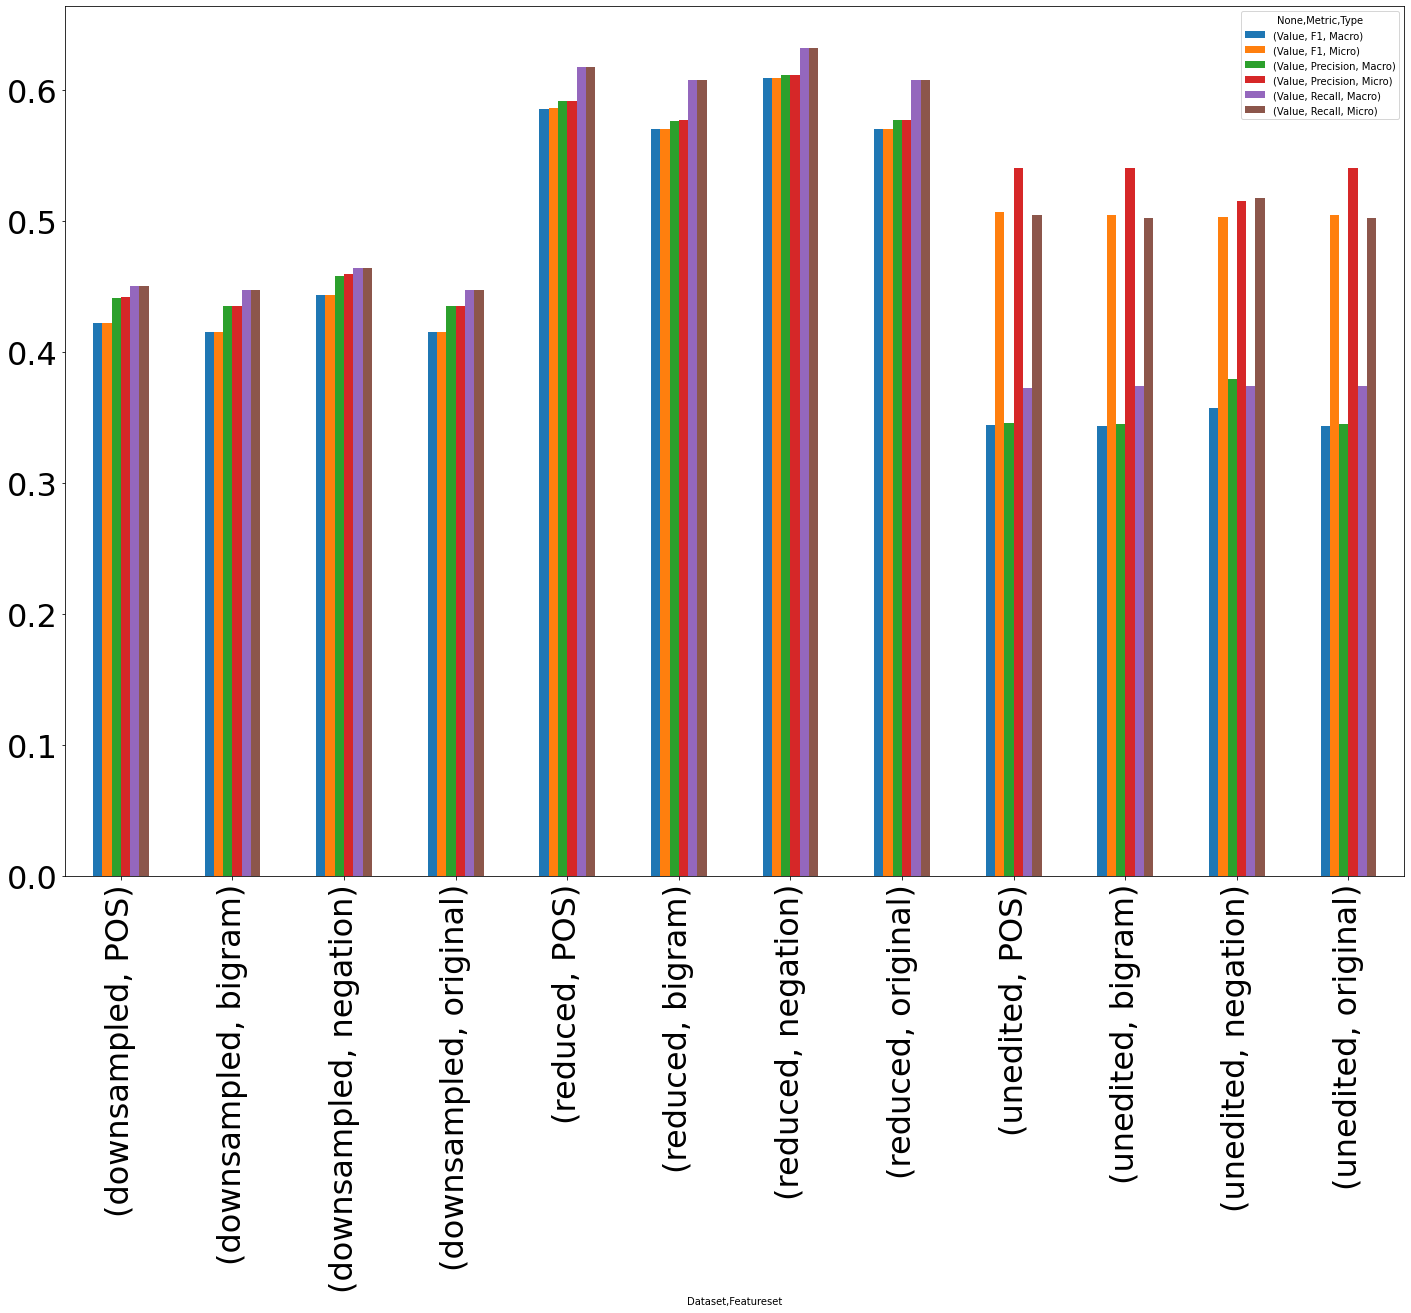

In [74]:
graph_data1.unstack(level=[2,3]).plot(kind = 'bar', stacked = False, figsize = (24,16), fontsize = 32)